## Viswanath allam 
### Task 6,
#### Data Science and Business Analytics Intern, Sparks Foundation.

### Iris Species Prediction using Decision Tree Algorithm
> In this project our objective is to classify and predict the species type of different type of Iris Flowers given with DataSet (link for dataset:'https://bit.ly/3kXTdox')

Let us start with the estimated steps to be followed as:
1. Installation of libraries and importing the modules(for installion we can use: "!pip install library_name" command to be used in jupyter)
2. Data Aquisition
3. Data Cleansing and processing
4. Exploratory Data Analysis
5. Creating an ML model
6. Implementation of the model
7. Acuuracy measurement
8. plotting the decision tree.

#### Decision Tree Classifier:
>A decision tree is a flowchart-like tree structure in which the internal node represents feature(or attribute), the branch represents a decision rule, and each leaf node represents the outcome. A Decision Tree consists of,

 1. Nodes: Test for the value of a certain attribute.
 2. Edges/Branch: Represents a decision rule and connect to the next node. 
 3. Leaf nodes: Terminal nodes that represent class labels or class distribution.

In [1]:
#getting started with importing the modules and setting matplotlib parameters.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import sklearn.datasets as datasets
import warnings

warnings.filterwarnings("ignore")

matplotlib.rcParams['font.size'] = 15
matplotlib.rcParams['figure.figsize'] = (15, 6)

In [2]:
 # Data Aquisition
    
iris_raw=datasets.load_iris()            ##raw data from datasets in sklearn library. 
iris_df=pd.read_csv('Iris.csv')          ##data provided in the link.

### Data Cleansing and processing as required for the ML model

In [3]:
### Transformation of species column using target data from iria_raw.

iris_df['Species']=iris_raw.target

In [4]:
iris_df.describe()            ### getting statistical info of numerical data.

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667,1.000000
std,43.445368,0.828066,0.433594,1.764420,0.763161,0.819232
min,1.000000,4.300000,2.000000,1.000000,0.100000,0.000000
25%,38.250000,5.100000,2.800000,1.600000,0.300000,0.000000
50%,75.500000,5.800000,3.000000,4.350000,1.300000,1.000000
75%,112.750000,6.400000,3.300000,5.100000,1.800000,2.000000
max,150.000000,7.900000,4.400000,6.900000,2.500000,2.000000


In [5]:
iris_df.drop(['Id'],axis=1,inplace=True)

In [6]:
iris_df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


#### Exploratory Analysis:

In [7]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [8]:
## to know the types of species

iris_raw['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

> NOTE: 
 > 1. 0 IS REPRESENTING 'SETOSA'
 > 2. 1 IS REPREESENTING 'VERSICOLOR'
 > 3. 2 IS REPRESENTING 'VIRGINICA'

<AxesSubplot:>

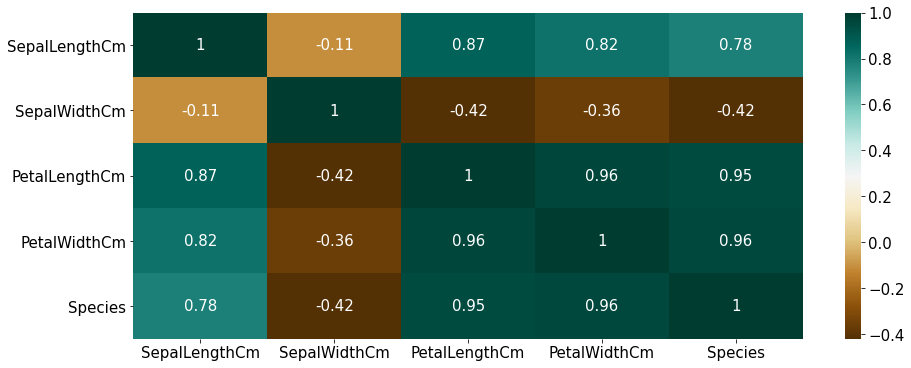

In [9]:
sns.heatmap(iris_df.corr(),annot=True,cmap='BrBG')    ## Plotting correlation matrix.

<AxesSubplot:xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

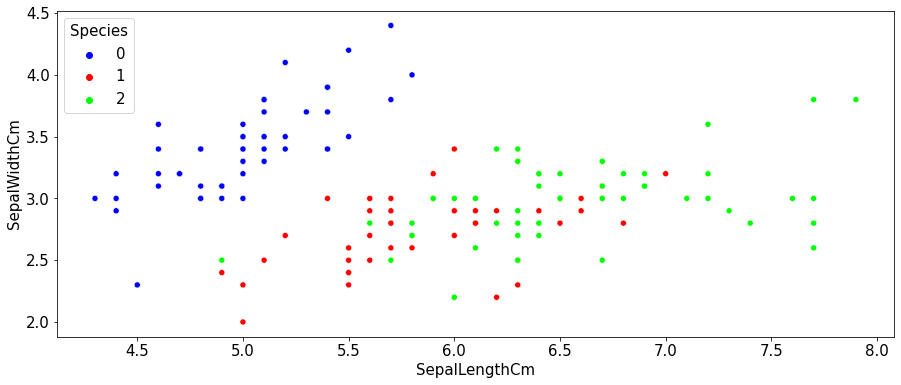

In [10]:
sns.scatterplot(x=iris_df.SepalLengthCm, y=iris_df.SepalWidthCm, hue=iris_df.Species,palette='brg')

> 1. By above plot we can say that SepalLength of SETOSA flowers can't be greater than 6Cm
> 2. By observing below plot SETOSA can't have PetalLength of greater than 2Cm

<AxesSubplot:xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

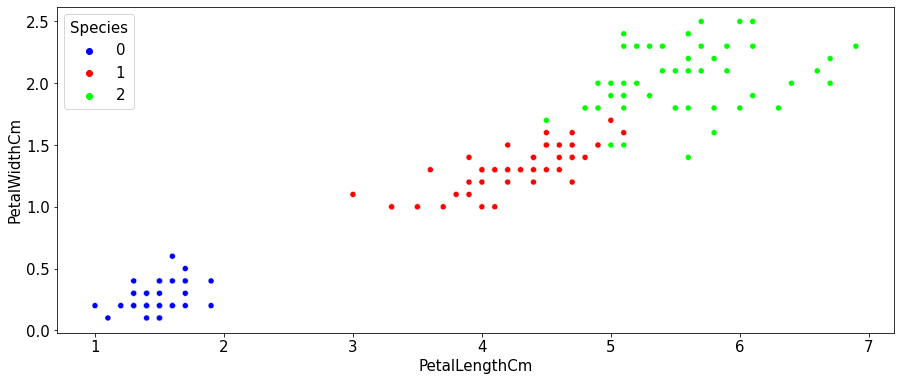

In [11]:
sns.scatterplot(x=iris_df.PetalLengthCm, y=iris_df.PetalWidthCm, hue=iris_df.Species,palette='brg')

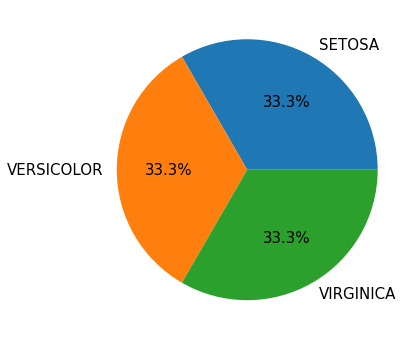

In [12]:
values_count=iris_df['Species'].value_counts().values
labels=['SETOSA','VERSICOLOR','VIRGINICA']
plt.pie(values_count,labels=labels,autopct='%1.1f%%')
plt.show()                                           

### Pie Chart Representation of percentage of different types exist in dataset.

> Thus our analyis part is completed and got some insights of the data. Now let's get started with the Model Implementation

#### x-y split & Train_test_split of Data

In [13]:
x=iris_df.drop(['Species'],axis=1)
y=iris_df['Species']

### Model Implementation.
Use this link for sklearn documentation :https://scikit-learn.org/stable/modules/classes.html#module-sklearn.model_selection

In [14]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import graphviz

In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [16]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(120, 4) (30, 4) (120,) (30,)


In [17]:
dec_tree=tree.DecisionTreeClassifier(splitter='best')

In [18]:
dec_tree.fit(x_train,y_train)

DecisionTreeClassifier()

In [19]:
accuracy_score(y_train,dec_tree.predict(x_train))

1.0

### Prediction by the proposed model.

In [20]:
y_test_pred=dec_tree.predict(x_test)

df_pred=pd.DataFrame({'True':y_test,
                     'Predicted':y_test_pred})

In [21]:
## Data Frame of true and predicted values.
df_pred.head(10)

,True,Predicted
133,2,1
103,2,2
42,0,0
91,1,1
7,0,0
118,2,2
47,0,0
84,1,1
24,0,0
9,0,0


### Accuracy Measurement

In [22]:
from sklearn.metrics import accuracy_score,plot_confusion_matrix

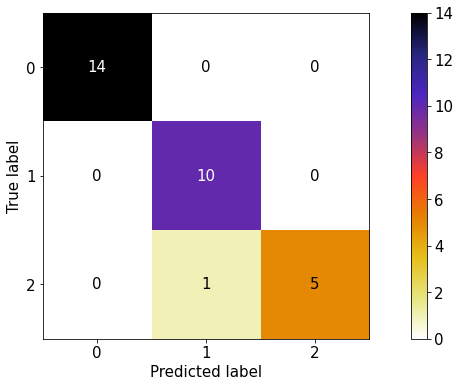

In [23]:
plot_confusion_matrix(dec_tree,x_test,y_test,cmap='CMRmap_r')

In [24]:
accuracy=accuracy_score(y_test,y_test_pred)
print('The accuracy score of model implemented is {}'.format(accuracy))

The accuracy score of model implemented is 0.9666666666666667


In [25]:
dec_tree.get_params()      ### These are the parameters we have applied by giving the best splitter as hyperparameter

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

> Thus the test accuracy of the model is 96.66% .

#### Decision Tree Plotting for the model implemented.

In [26]:
dot_tree=tree.export_graphviz(dec_tree,out_file=None,feature_names=x_train.columns,filled=True)

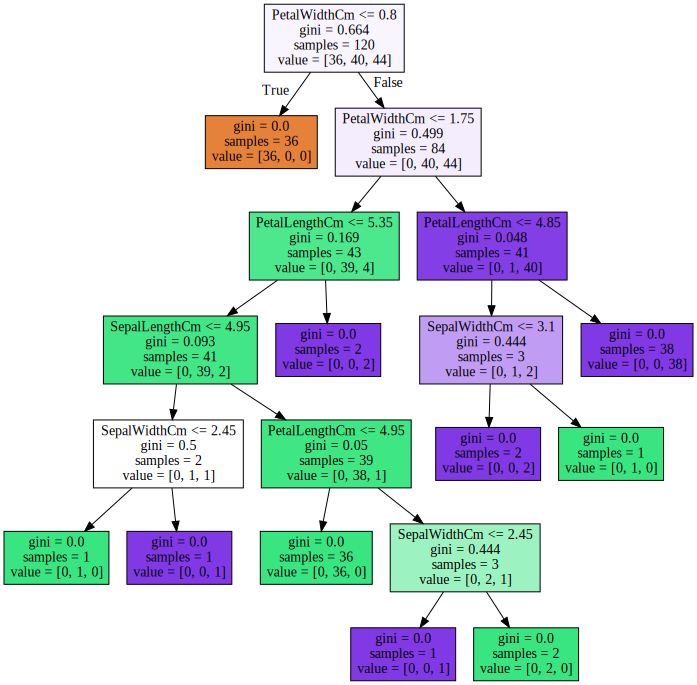

In [27]:
graphviz.Source(dot_tree)

#### Note: Gini Index is the measure of purity of the node.
> classification in leaf of the decision tree
> 1. CLASS 0 i.e; SETOSA class is represented as the brown colored box.
> 2. CLASS 1 i.e; VERSICOLOR class is represented as the green colored box.
> 3. CLASS 2 i.e; VIRGINICA class is represented as the dark blue colored box.

### Thus we have predicted the decision tree of the iris dataset with the accuracy percentage of 96.66% and plotted the decision tree for the same.